# 用决策树进行客户满意度分析

分析流程:

![](img/aa2.png)

## 业务背景

移动服务用户满意度分析：
- 1----热线是某移动客服中心重要的客户服务渠道，因为热线渠道的服务质量好坏将直接影响客户对于该移动客户服务的整体影响，因此，公司决定开展关于1----热线服务的热线满意度调研，以了解客户的满意度情况以及服务短板。
- 对于客服中心来说，若能够提前了解调研客户对象有可能会对热线服务不满意的，并进行关怀修复，提高客户感知，降低不满意率，更为重要。

需求分析：
- 现公司客服部门希望基于以往的热线调研满意度情况，进行不满意客户的预测，并希望了解不满意客户的不满意原因，从而能够在事前采取相应措施，提升客户服务质量。

**分析目标**:
- 预测客户是否满意
- 解释客户是否满意的原因

## 数据理解

![](img/aa1.png)

可见:
- 基本信息都是无序分类变量
- 行为信息度可以认为是连续变量,其中首问可以认为是二分类变量

## 数据探索

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### 读取数据

In [3]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

### 简单描述

通过info查看数据集的简单描述:总行数,每个属性的类型和非空值的数量

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1089 entries, 0 to 1088
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   cust_number               1089 non-null   int64  
 1   Satisfaction              1089 non-null   int64  
 2   brand                     1089 non-null   int64  
 3   gender                    1089 non-null   int64  
 4   Is_JoyOnline              1089 non-null   int64  
 5   Call_server_Times         1089 non-null   int64  
 6   Request_Service_Times     1089 non-null   int64  
 7   Connect_Service_Times     1089 non-null   int64  
 8   AVG_Call_Time             1089 non-null   int64  
 9   Fail_Service_Times        1089 non-null   int64  
 10  Repeat_Times_2_Hours      1089 non-null   int64  
 11  First_Call                1089 non-null   int64  
 12  Repeat_Call_Day_Time      1089 non-null   int64  
 13  AVG_Wait_Time             1089 non-null   float64
 14  Wait_Tim

In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 432 entries, 0 to 431
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   cust_number               432 non-null    int64  
 1   Satisfaction              432 non-null    int64  
 2   brand                     432 non-null    int64  
 3   gender                    432 non-null    int64  
 4   Is_JoyOnline              432 non-null    int64  
 5   Call_server_Times         432 non-null    int64  
 6   Request_Service_Times     432 non-null    float64
 7   Connect_Service_Times     432 non-null    float64
 8   AVG_Call_Time             432 non-null    int64  
 9   Fail_Service_Times        432 non-null    float64
 10  Repeat_Times_2_Hours      432 non-null    int64  
 11  First_Call                432 non-null    int64  
 12  Repeat_Call_Day_Time      432 non-null    int64  
 13  AVG_Wait_Time             432 non-null    float64
 14  Wait_Times

- 数据的每列都是自解释的
- 数据训练集包含1089个实例,测试集包含432个实例,对于机器学习来说数据量非常非常小
- 训练集和测试集属性一致,均没有数值上的缺失
- 所有属性都是数值型的

通过describe()查看各属性摘要

In [7]:
train.head()

,cust_number,Satisfaction,brand,gender,Is_JoyOnline,Call_server_Times,Request_Service_Times,Connect_Service_Times,AVG_Call_Time,Fail_Service_Times,Repeat_Times_2_Hours,First_Call,Repeat_Call_Day_Time,AVG_Wait_Time,Wait_Times,Connect_Times_30_Seconds,Connect_Rate_30_Seconds
0,13411103825,0,2,-1,0,3,1,0,0,1,0,0,0,31.0,1.0,0,0
1,13411112135,0,2,-1,0,2,2,0,0,2,0,0,0,30.0,2.0,0,0
2,13411120011,0,2,-1,0,2,2,0,0,2,0,0,0,30.0,2.0,0,0
3,13411121001,0,2,-1,0,3,2,0,0,2,0,0,0,31.0,2.0,0,0
4,13411126590,0,2,-1,1,3,2,0,0,2,0,0,0,30.0,2.0,0,0


In [6]:
train.describe(include="all").T

,count,mean,std,min,25%,50%,75%,max
cust_number,1089.0,1.379125e+10,7.859846e+08,1.341110e+10,1.342052e+10,1.354243e+10,1.375176e+10,1.871934e+10
Satisfaction,1089.0,2.295684e-01,4.207485e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
brand,1089.0,1.699725e+00,6.336243e-01,0.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00
gender,1089.0,-8.787879e-01,3.976031e-01,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,1.000000e+00
Is_JoyOnline,1089.0,3.131313e-01,4.639804e-01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
Call_server_Times,1089.0,4.044995e+00,4.393427e+00,1.000000e+00,2.000000e+00,3.000000e+00,5.000000e+00,4.400000e+01
Request_Service_Times,1089.0,1.410468e+00,7.785737e-01,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,7.000000e+00
Connect_Service_Times,1089.0,4.407713e-02,2.605923e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
AVG_Call_Time,1089.0,3.489440e-02,1.835967e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
Fail_Service_Times,1089.0,1.366391e+00,7.217791e-01,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,7.000000e+00


可见:
- 其中满意度变量中1的占比是23%,数据相对均匀
- gender中有-1表示的缺失值

查看gender的分布情况

In [6]:
train.gender.value_counts(normalize=True)

-1    0.904500
 0    0.069789
 1    0.025712
Name: gender, dtype: float64

- gender中缺失值占比90%,且属于无序分类变量,可以认为缺失值是单独一类

### 可视化

查看各变量的分布情况,针对决策树算法.主要是查看x不同取值(范围)下y的分布
- 可以通过堆栈条形图查看x的每个数值上y的变化

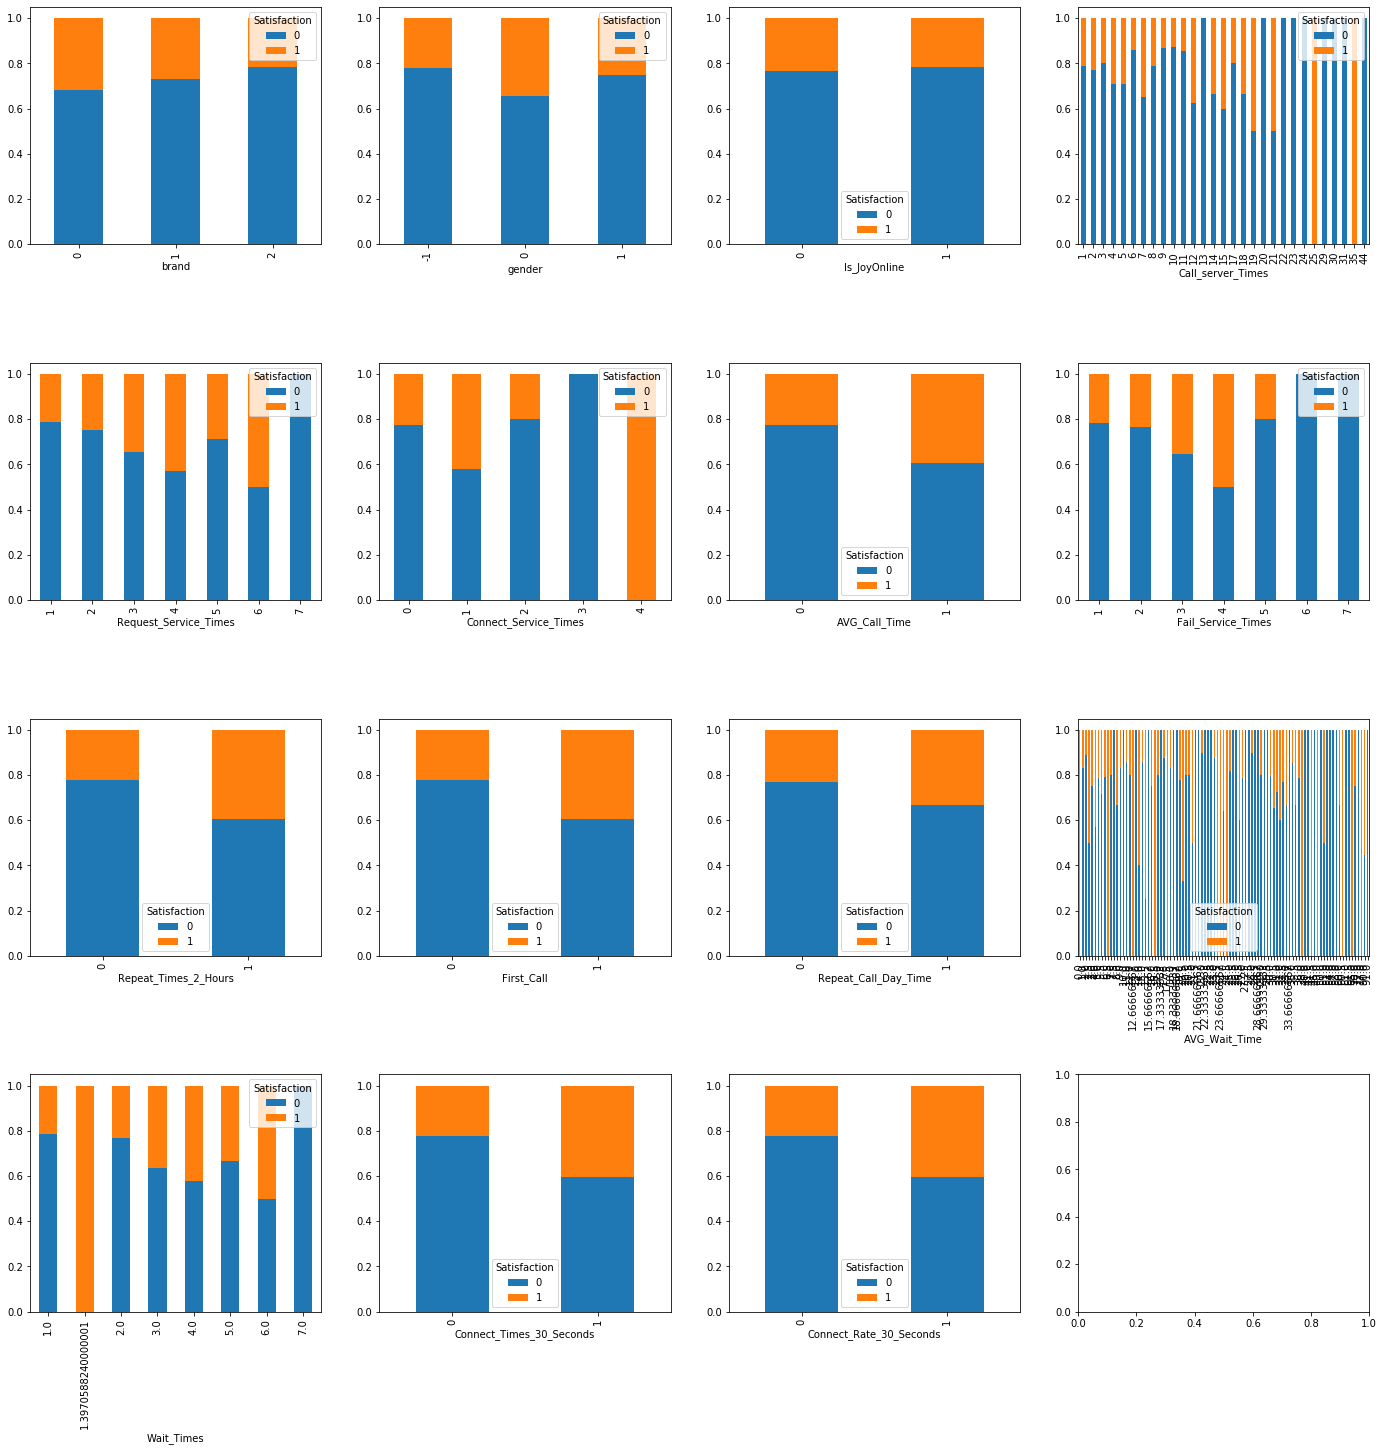

In [7]:
# 做堆栈条形图
from matplotlib.figure import SubplotParams
fig,axs=plt.subplots(nrows=4,ncols=4,figsize=(24,24),
                     subplotpars = SubplotParams(hspace = 0.5))
# SubplotParams为了控制多图布局中的每个图形之间的间隔
colnames = list(train.columns)[2:]
for i,r in enumerate(colnames):
    table= pd.crosstab(train[r],train.Satisfaction)
    # 根据非数值列和y列创建交叉表
    table.div(table.sum(1).astype(float),axis=0).plot(
        kind="bar",stacked=True,ax=axs[i//4,i%4])

可见:
- Is_JoyOnline对y几乎没有影响,其他属性均有影响
- 所有多值连续属性的变化都不是线性的,而算法需要解释,所以相对逻辑回归来说决策树的拟合效果应该更好

## 数据清洗

分数据

In [9]:
y = 'Satisfaction'
train_y = train[y]
train_X = train.drop(y, axis=1)
test_y = test[y]
test_X = test.drop(y, axis=1)

定义清洗函数

In [10]:
def Pre_clean(X):
    # 删除cust_number列
    X.drop('cust_number', axis=1, inplace=True)
    # brand列独热编码
    X = X.astype({'brand':'object', 'gender':'object'})
    X = pd.get_dummies(X, prefix=['brand','gender'], prefix_sep='')
    return X

清洗数据

In [11]:
train_X = Pre_clean(train_X)
test_X = Pre_clean(test_X)

查看清洗后结果

In [12]:
train_X.describe().T

,count,mean,std,min,25%,50%,75%,max
Is_JoyOnline,1089.0,0.313131,0.463980,0.0,0.0,0.0,1.0,1.0
Call_server_Times,1089.0,4.044995,4.393427,1.0,2.0,3.0,5.0,44.0
Request_Service_Times,1089.0,1.410468,0.778574,1.0,1.0,1.0,2.0,7.0
Connect_Service_Times,1089.0,0.044077,0.260592,0.0,0.0,0.0,0.0,4.0
AVG_Call_Time,1089.0,0.034894,0.183597,0.0,0.0,0.0,0.0,1.0
Fail_Service_Times,1089.0,1.366391,0.721779,1.0,1.0,1.0,2.0,7.0
Repeat_Times_2_Hours,1089.0,0.034894,0.183597,0.0,0.0,0.0,0.0,1.0
First_Call,1089.0,0.034894,0.183597,0.0,0.0,0.0,0.0,1.0
Repeat_Call_Day_Time,1089.0,0.005510,0.074056,0.0,0.0,0.0,0.0,1.0
AVG_Wait_Time,1089.0,25.452984,14.208972,0.0,16.5,30.0,30.0,91.0


## 决策树建模

### 模型调优

In [13]:
from sklearn import tree
from sklearn.model_selection import GridSearchCV

- 参数候选值

In [14]:
param_grid = {
    "ccp_alpha": np.linspace(0,0.01,50)
    , "max_depth": range(2,10)
    , "min_samples_leaf": range(1,101,5)
}

+ 网格搜索

In [15]:
clf = GridSearchCV(tree.DecisionTreeClassifier(), 
                  param_grid, scoring="roc_auc")
clf.fit(train_X, train_y)

GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid=...
       0.00612245, 0.00632653, 0.00653061, 0.00673469, 0.00693878,
       0.00714286, 0.00734694, 

In [16]:
clf.best_score_

0.5335084117479327

In [17]:
clf.best_params_

{'ccp_alpha': 0.0, 'max_depth': 9, 'min_samples_leaf': 36}

In [19]:
print(f"train set auc score: {clf.score(train_X,train_y)}")
print(f"test set auc score: {clf.score(test_X,test_y)}")

train set auc score: 0.6378545887961861
test set auc score: 0.5344840331164991


In [20]:
clf0 = tree.DecisionTreeClassifier(**clf.best_params_)

In [21]:
clf0.fit(train_X, train_y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=36, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

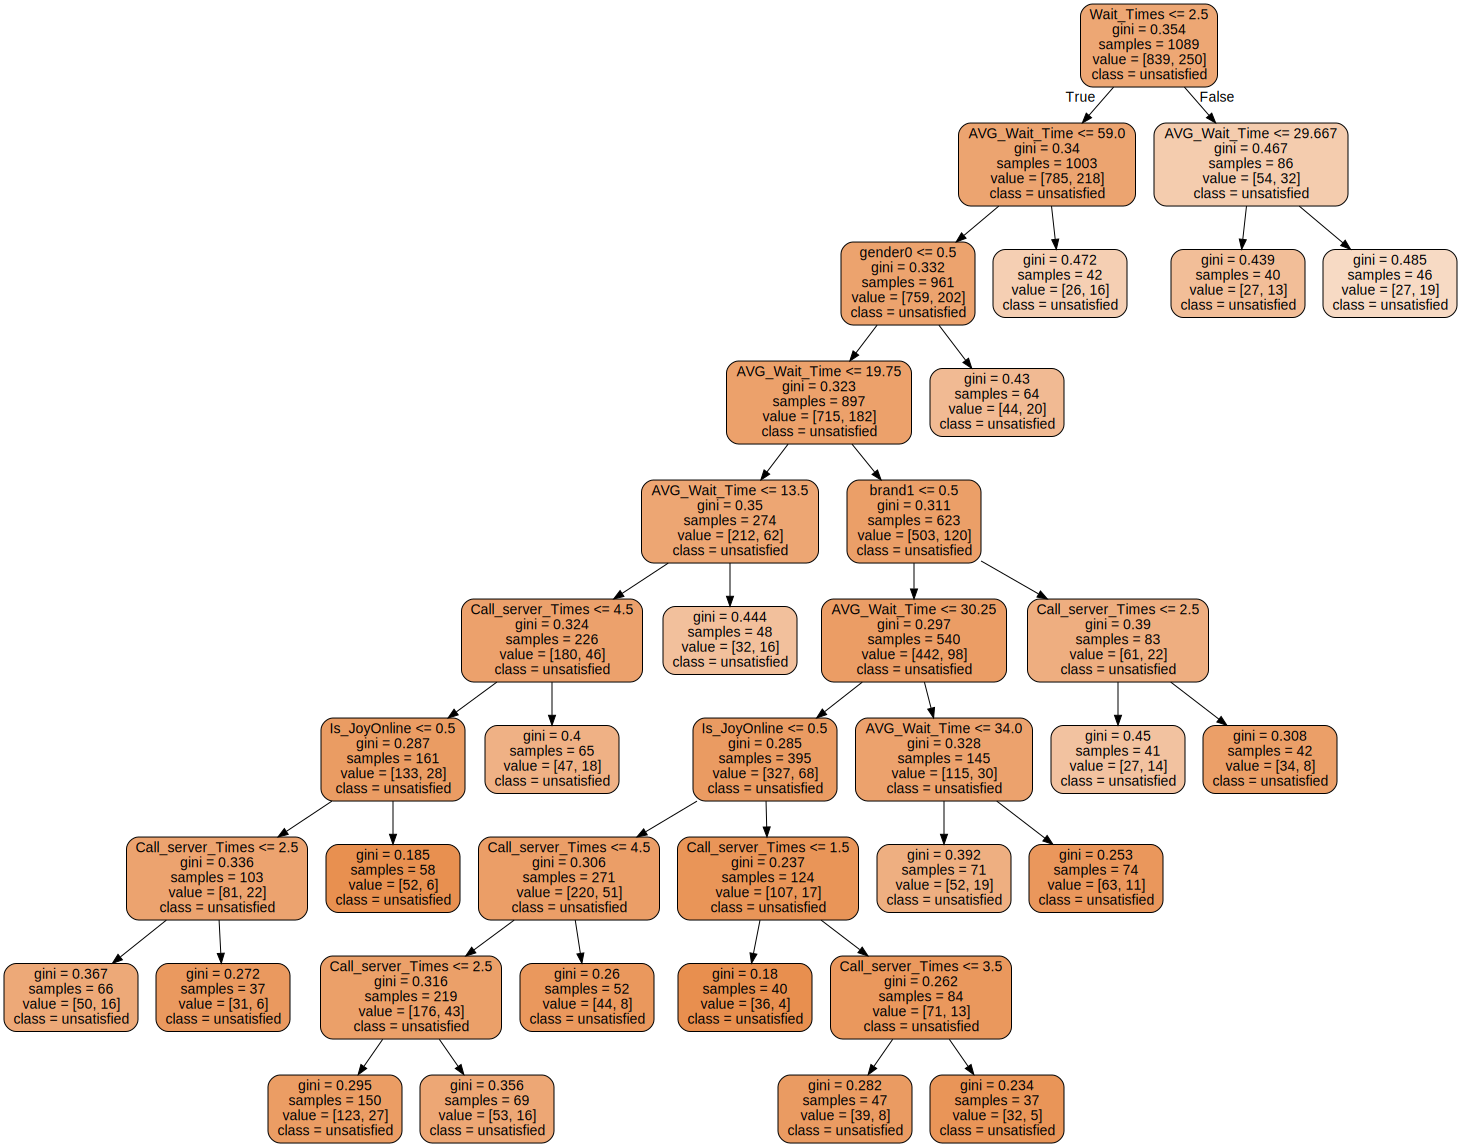

In [23]:
import graphviz
dot = tree.export_graphviz(clf0,out_file=None,
                           feature_names=train_X.columns,
                           class_names = ['unsatisfied', 'satisfied'],
                           filled=True,rounded=True)
# 生成一个DOT格式的决策树
graph = graphviz.Source(dot)
# 使用graphviz逐字渲染dot对象
graph.render("Satisfaction")
# 生成对应的图形文件Satisfaction.pdf
graph

### 模型评估

+ ROC曲线

In [21]:
from sklearn.metrics import plot_roc_curve

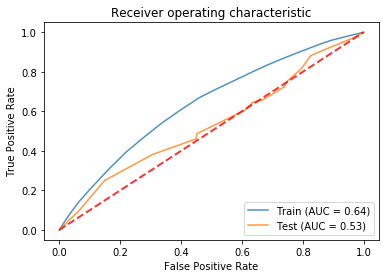

In [22]:
fig, ax = plt.subplots()
plot_roc_curve(clf0, train_X, train_y, alpha=0.8, ax=ax, name='Train')
plot_roc_curve(clf0, test_X, test_y, alpha=0.8, ax=ax, name='Test')
ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)
ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="Receiver operating characteristic")
plt.show()